In [ ]:
import numpy as np
import pandas as pd
import operator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#import data

beijing = pd.read_csv("Beijing_labeled.csv")
shenyang = pd.read_csv("Shenyang_labeled.csv")
guangzhou = pd.read_csv("Guangzhou_labeled.csv")
shanghai = pd.read_csv("Shanghai_labeled.csv")

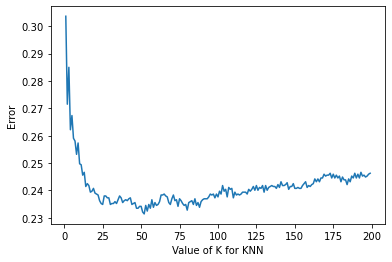

In [ ]:
#create the training data

traindata = beijing.append(shenyang)

x = traindata.iloc[:, :-1].values
y = traindata.iloc[:, -1].values

train_x, validate_x, train_y, validate_y = train_test_split(x, y, test_size = 0.4)

#determine the best k value using the existing knn by CrossValidation

k_range = range(1, 200)
k_error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, scoring = 'accuracy')
    k_error.append(1 - scores.mean())

plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

According to the graph above, when k = 50, the error will be the least. We will then choose k = 50. 

In [ ]:
# create a new knn 

def e_dist(I1, I2):
    
    return np.sqrt(np.sum((I1 - I2)**2))

class KNN():
    
    def __init__(self, K):
        self.K = K
        
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
        
    def predict(self, X_test):
             
        predictions = []
                
        for i in range(len(X_test)):            
                   
            dist = np.array([e_dist(X_test[i], x_t) for x_t in self.X_train])
                      
            dist_sorted = dist.argsort()[:self.K]
            
            n_neighbours = {}
          
            for j in dist_sorted:
                
                if self.Y_train[j] in n_neighbours:
                     
                    n_neighbours[self.Y_train[j]] += 1
                    
                else:
                    
                    n_neighbours[self.Y_train[j]] = 1
            
            sorted_n_neighbours = sorted(n_neighbours.items(), key = operator.itemgetter(1), reverse = True)
            
            predictions.append(sorted_n_neighbours[0][0])
            
        return predictions

    def score(self, x, y):
        
        score = accuracy_score(self.predict(x), y)  
        
        return score

In [ ]:
#train the model

knn = KNN(K = 50)
knn.fit(train_x, train_y)


In [ ]:
predictions = knn.predict(validate_x)
score = knn.score(validate_x, validate_y)
print(score)

0.7737478411053541


In [ ]:
test_x_1 = guangzhou.iloc[:, :-1].values
test_y_1 = guangzhou.iloc[:, -1].values

test_x_2 = shanghai.iloc[:, :-1].values
test_y_2 = shanghai.iloc[:, -1].values

predictions = knn.predict(test_x_1)
score1 = knn.score(test_x_1, test_y_1)
print(score1)

0.6708579881656804


In [ ]:
predictions = knn.predict(test_x_2)
score2 = knn.score(test_x_2, test_y_2)
print(score2)

0.7905255366395263
